In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [27]:
data=pd.read_excel('.\ODHP_dataset.xlsx')
data.head()

,序号,催化剂引用的文献,催化剂种类,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,...,Flow rate(C3H8),Flow rate(O2),Flow rate(Protect gas),金属基,mode,GHSV(Flow rate),Temperature(℃),Con,Sel,丙烯产率
0,1.0,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1,0.057594
1,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0,0.064600
2,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9,0.317031
3,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3,0.067140
4,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.50)/BN,Pt,1.1,2.28,Sn,0.50,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2,0.375408


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   序号                      101 non-null    float64
 1   催化剂引用的文献                514 non-null    object 
 2   催化剂种类                   513 non-null    object 
 3   金属1                     305 non-null    object 
 4   占比1                     305 non-null    float64
 5   金属1电负性                  60 non-null     float64
 6   金属2                     19 non-null     object 
 7   占比2                     19 non-null     float64
 8   金属2电负性                  12 non-null     float64
 9   非金属1                    225 non-null    object 
 10  占比3                     225 non-null    float64
 11  负载1                     367 non-null    object 
 12  占比4                     367 non-null    float64
 13  Flow rate(C2H6)         11 non-null     float64
 14  Flow rate(C3H8)         514 non-null    fl

In [29]:
data=data.loc[:,'金属1':'Sel']
data

,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,占比3,负载1,占比4,Flow rate(C2H6),Flow rate(C3H8),Flow rate(O2),Flow rate(Protect gas),金属基,mode,GHSV(Flow rate),Temperature(℃),Con,Sel
0,Pt,1.10,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1
1,Pt,1.10,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0
2,Pt,1.10,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9
3,Pt,1.10,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3
4,Pt,1.10,2.28,Sn,0.50,1.96,BN,98.40,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Mo,4.27,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,95.73,NaN,29.4,9.6,61.0,1.0,2,NaN,605,5.0,77.0
510,Mo,9.38,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,90.62,NaN,29.4,9.6,61.0,1.0,2,NaN,597,5.0,80.0
511,Mo,14.80,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,85.20,NaN,29.4,9.6,61.0,1.0,2,NaN,633,5.0,78.0
512,Mo,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,9.6,61.0,1.0,1,NaN,629,5.0,64.0


In [31]:
data.loc[:,'GHSV(Flow rate)'].fillna(data.loc[:,'GHSV(Flow rate)'].mean(),inplace=True)
data.loc[:,'Con'].fillna(data.loc[:,'Con'].mean(),inplace=True)
data.loc[:,'Sel'].fillna(data.loc[:,'Sel'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   金属1                     305 non-null    object 
 1   占比1                     305 non-null    float64
 2   金属1电负性                  60 non-null     float64
 3   金属2                     19 non-null     object 
 4   占比2                     19 non-null     float64
 5   金属2电负性                  12 non-null     float64
 6   非金属1                    225 non-null    object 
 7   占比3                     225 non-null    float64
 8   负载1                     367 non-null    object 
 9   占比4                     367 non-null    float64
 10  Flow rate(C2H6)         11 non-null     float64
 11  Flow rate(C3H8)         514 non-null    float64
 12  Flow rate(O2)           514 non-null    float64
 13  Flow rate(Protect gas)  514 non-null    float64
 14  金属基                     255 non-null    fl

C:\Users\Dell\AppData\Local\Temp\ipykernel_32508\1422803138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,'GHSV(Flow rate)'].fillna(data.loc[:,'GHSV(Flow rate)'].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_32508\1422803138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [6]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 3]])))
data1

[nan, 'V', 'Na', 'Pt', 'Li', 'Ni', 'Sn', 'K', 'Hf', 'Mo', 'Mg', 'Ti', 'W']

In [32]:
data_1 = pd.DataFrame(np.zeros((514, 13)), columns=data1)
data_1

,NaN,V,Na,Pt,Li,Ni,Sn,K,Hf,Mo,Mg,Ti,W
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 3]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 4]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [34]:
data2 = list(set(data.iloc[:, 6]))
len(data2)

10

In [35]:
data_2 = pd.DataFrame(np.zeros((514, 10)), columns=data2)

In [36]:
num_1 = 0
for i in data.iloc[:, 6]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 7]
        num_1 = num_1 + 1
data_2 = data_2.dropna(axis=1)

In [37]:
data_2.head()

,B,C,CB,P,Si,BON,B2O3,BPO4,BN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.90
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.90
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.65
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.65
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.40


In [38]:
data3 = list(set(data.iloc[:, 8]))
len(data3)

18

In [39]:
data_3 = pd.DataFrame(np.zeros((514,18)), columns=data3)

In [40]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data3:
        index_2 = data3.index(i)
        index_1 = num_1
        data_3.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
data_3 = data_3.dropna(axis=1)

In [41]:
data_3

,MCM,Al2O3,Nb2O5,MgO,SBA-16,C,HMS,ZrO2,MCF,Si,SBA-15,CeO2,TiO2,S-1,MCM-41,SiO2,BPO4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.73,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.62,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.20,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [43]:
data_use=pd.concat([data_1,data_2,data_3,data.loc[:,'Flow rate(C2H6)':'Sel']],axis=1)
data_use

,V,Na,Pt,Li,Ni,Sn,K,Hf,Mo,Mg,...,Flow rate(C2H6),Flow rate(C3H8),Flow rate(O2),Flow rate(Protect gas),金属基,mode,GHSV(Flow rate),Temperature(℃),Con,Sel
0,0.00,0.0,1.1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,17.4,33.1
1,0.00,0.0,1.1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,19.0,34.0
2,0.00,0.0,1.1,0.0,0.0,0.25,0.0,0.0,0.00,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,42.9,73.9
3,0.00,0.0,1.1,0.0,0.0,0.25,0.0,0.0,0.00,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,18.0,37.3
4,0.00,0.0,1.1,0.0,0.0,0.50,0.0,0.0,0.00,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,4.27,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,605,5.0,77.0
510,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.38,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,597,5.0,80.0
511,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,14.80,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,633,5.0,78.0
512,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,100.00,0.0,...,NaN,29.4,9.6,61.0,1.0,1,26509.106383,629,5.0,64.0


In [44]:
data_use.fillna(0,inplace=True)
data_use=data_use.drop(['金属基'],axis=1)
data_use

,V,Na,Pt,Li,Ni,Sn,K,Hf,Mo,Mg,...,BPO4,Flow rate(C2H6),Flow rate(C3H8),Flow rate(O2),Flow rate(Protect gas),mode,GHSV(Flow rate),Temperature(℃),Con,Sel
0,0.00,0.0,1.1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,17.4,33.1
1,0.00,0.0,1.1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,19.0,34.0
2,0.00,0.0,1.1,0.0,0.0,0.25,0.0,0.0,0.00,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,42.9,73.9
3,0.00,0.0,1.1,0.0,0.0,0.25,0.0,0.0,0.00,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,18.0,37.3
4,0.00,0.0,1.1,0.0,0.0,0.50,0.0,0.0,0.00,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,4.27,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,605,5.0,77.0
510,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.38,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,597,5.0,80.0
511,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,14.80,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,633,5.0,78.0
512,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,100.00,0.0,...,0.0,0.0,29.4,9.6,61.0,1,26509.106383,629,5.0,64.0


In [47]:
data_use.to_csv('use.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


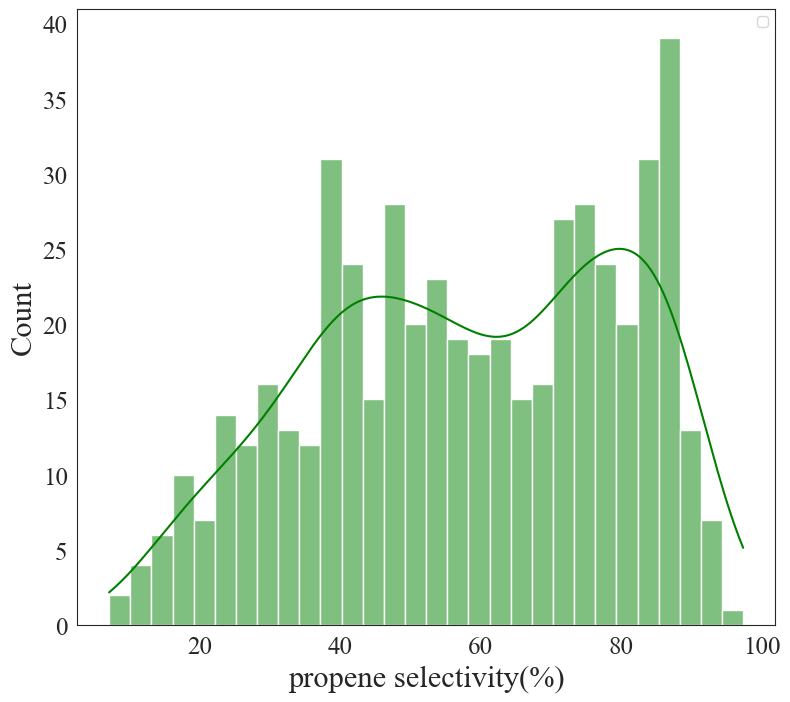

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Sel'],color='g',bins=30,kde=True)
plt.xlabel('propene selectivity(%)',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('Count',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=18,fontname='Times New Roman')
plt.yticks(fontsize=18,fontname='Times New Roman')
plt.legend()
plt.show()

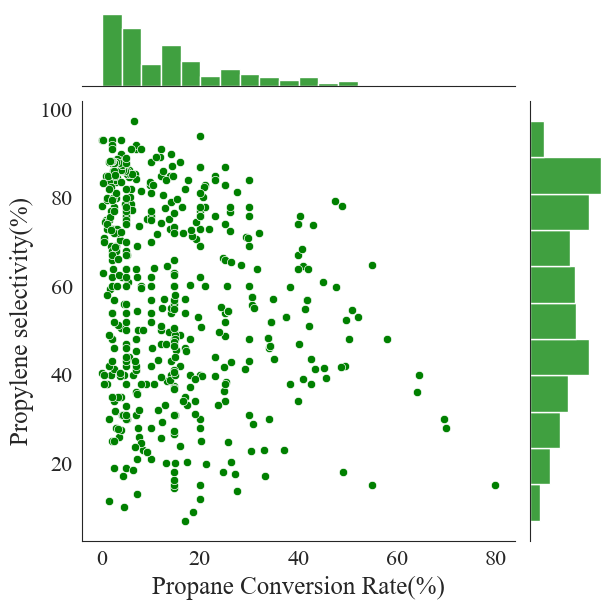

In [49]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Con",y="Sel",data=data,color='g')
plt.rc('font',family='Times New Roman', size=15)
plt.xlabel('Propane Conversion Rate(%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('Propylene selectivity(%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.show()

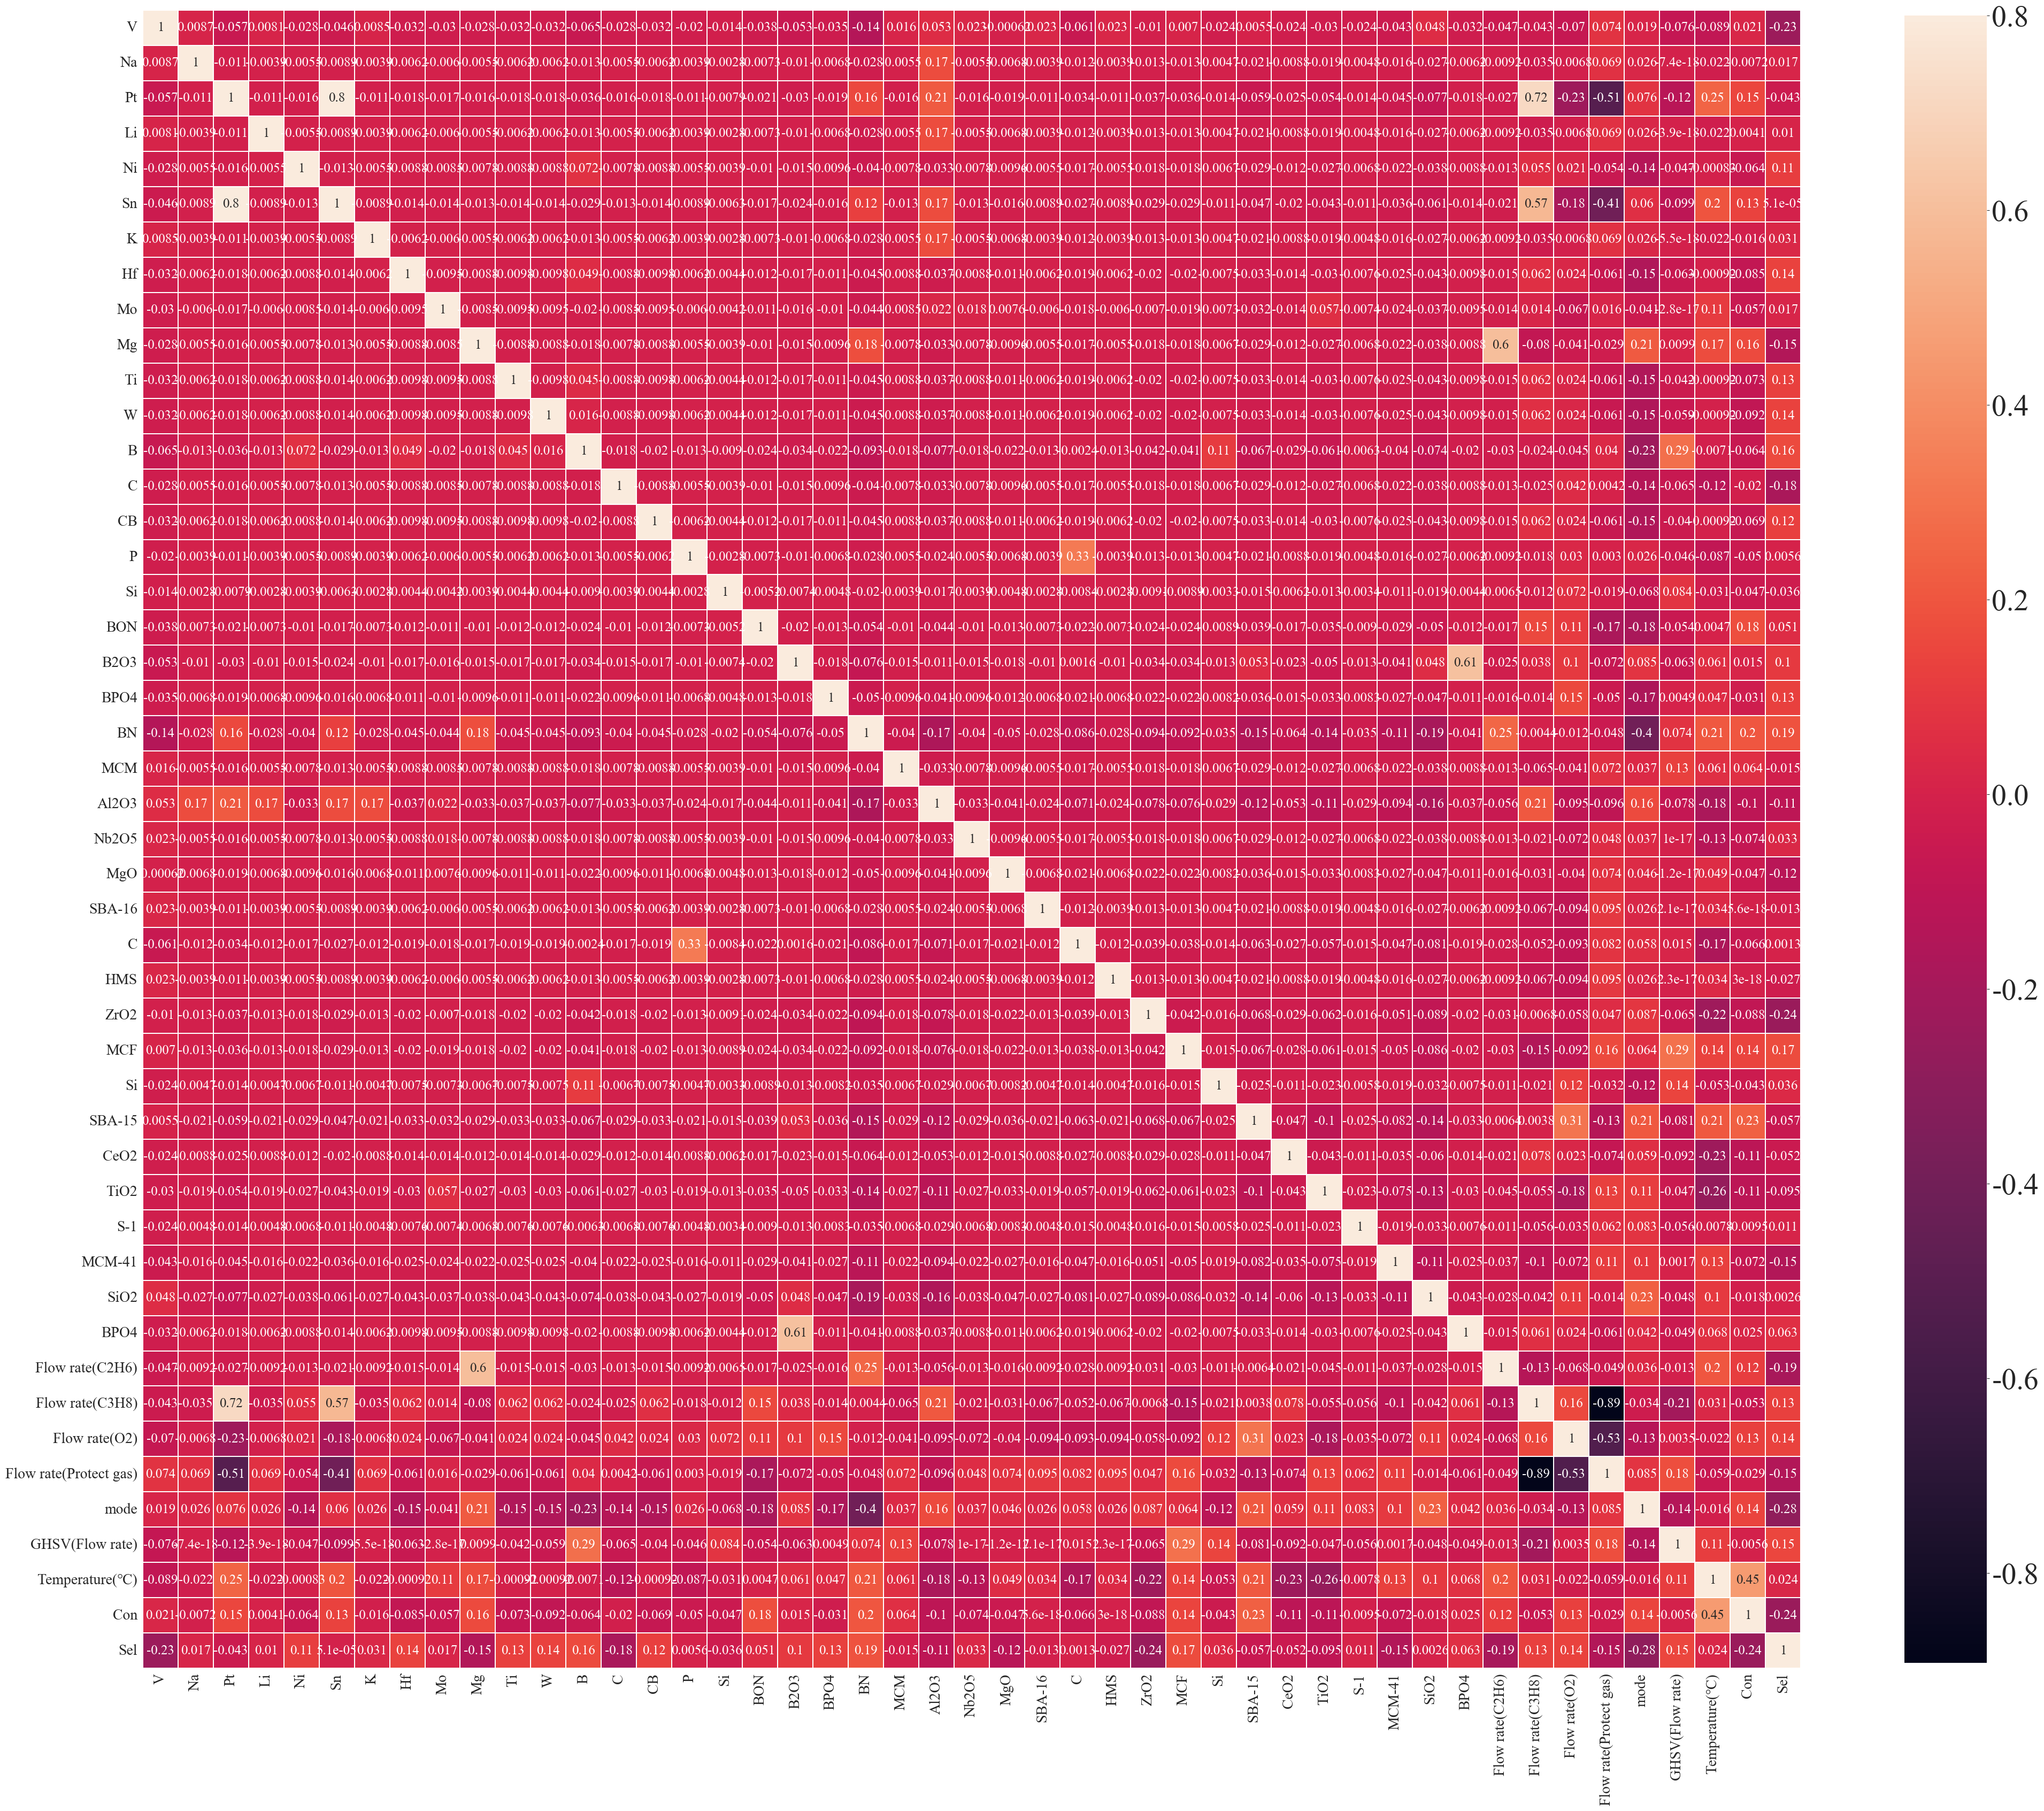

In [50]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data_use.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()